In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(image, name=''):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

# 图像轮廓

cv2.findContours() 函数是 OpenCV 库中的一个函数，用于在二值图像中找到轮廓。</br>轮廓是图像中亮度值从亮到暗或者从暗到亮的变化的线段。这些轮廓可以用来识别图像中的对象和形状。

##### contours, hierarchy = cv2.findContours(image, mode, method[, offset])

参数：</br>
- image：输入图像，必须是单通道的，通常是二值图像。
- mode：轮廓检索模式，可以是以下几种之一：
- - cv2.RETR_EXTERNAL：只检索最外层的轮廓。
- - cv2.RETR_LIST：检索所有轮廓，并保存在一条链表中，没有层次关系。
- - cv2.RETR_CCOMP：检索所有轮廓及其层次关系，但不包括边界。
- - cv2.RETR_TREE：检索所有轮廓及其层次关系，包括边界。
- method：轮廓近似方法，可以是以下几种之一：
- - cv2.CHAIN_APPROX_NONE：保留所有轮廓点，没有近似。
- - cv2.CHAIN_APPROX_SIMPLE：仅保留轮廓点的起始、结束和转折点。
- - cv2.CHAIN_APPROX_TC89_L1：使用 Teh-Chin 链码的近似方法。
- - cv2.CHAIN_APPROX_TC89_KCOS：使用 Teh-Chin 链码的近似方法。
- offset：用于轮廓的偏移量，可以用来将轮廓从原始图像的边界偏移一定的像素。

返回值：</br>
- contours 是轮廓列表，每个轮廓都是一个由点组成的列表，这些点定义了轮廓的形状。
- hierarchy 是一个四元组列表，用于表示每个轮廓与其父轮廓、子轮廓、兄弟轮廓和自身的关系。

##### 示例

为了更高的准确率，使用二值图像

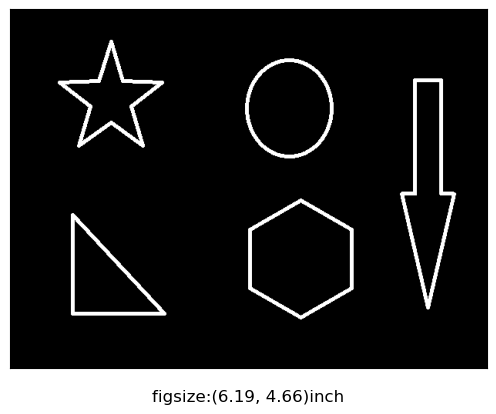

In [5]:
img = cv2.imread('assets/contours.png')
# 转化为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 将灰度图转化为二值图像
# type=cv2.THRESH_BINARY：像素值大于阈值thresh时，像素值设置为maxval，否则设置为0
ret, thresh = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
cv_show('', thresh)
plt_show(thresh)

mode参数一般选用cv2.RETR_TREE</br>
method参数一般用cv2.CHAIN_APPROX_NONE或cv2.CHAIN_APPROX_SIMPLE

In [4]:
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

绘制轮廓

cv2.drawContours() 函数是 OpenCV 库中的一个函数，用于在图像上绘制轮廓。

##### res = cv2.drawContours(image, contours, contour_index, color, thickness[, lineType[, hierarchy]])

参数：</br>
- image：输入图像，通常是彩色图像。
- contours：轮廓列表，其中每个轮廓是一个由点组成的列表，这些点定义了轮廓的形状。
- contour_index：轮廓的索引，表示要绘制的轮廓。如果设置为 -1，则绘制所有轮廓。
- color：轮廓的颜色，它是一个由三个元素组成的元组，分别代表BGR的值。
- thickness：轮廓的厚度，可以是以下几种之一：
- - cv2.LINE_8：使用8-连通性来填充轮廓。
- - cv2.LINE_AA：使用抗锯齿的线，适用于低分辨率。
- - 正值：表示线宽。
- - 负值：表示填充轮廓，填充的边界由 thickness 指定。
- lineType：线型，默认为 cv2.LINE_8。
- hierarchy：轮廓层次信息，如果提供了这个参数，函数会使用轮廓层次信息来正确绘制轮廓。

**注意**：函数会直接在输入图像image上绘制轮廓（即原图image会被修改），建议绘制轮廓前先copy保留原图

返回值：</br>
该函数的返回值res是绘制轮廓后的图像。

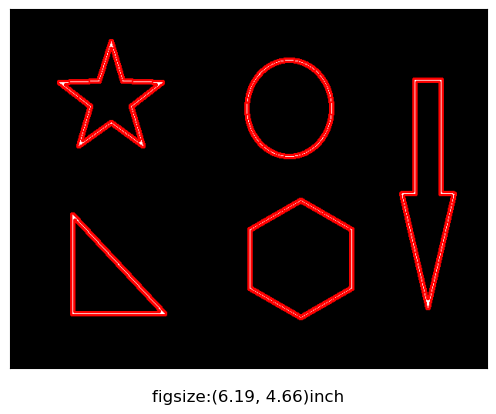

In [7]:
# 传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
# 注意需要copy保留原图，否则cv2.drawContours会直接在图像上绘制轮廓
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
cv_show('res', res)
plt_show(res)

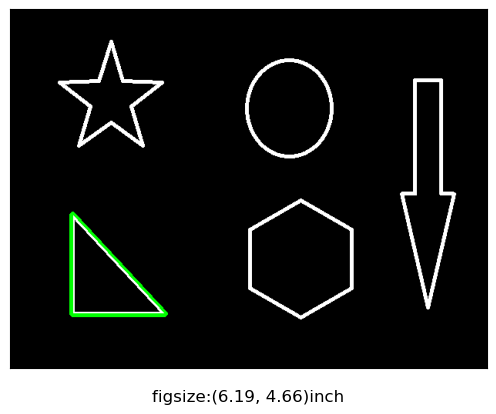

In [8]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 255, 0), 3)
cv_show('res', res)
plt_show(res)

### 轮廓特征

In [38]:
cnt = contours[0]

In [39]:
# 计算面积（单位：像素）
cv2.contourArea(cnt)

8500.5

In [40]:
# 计算周长
# 如果 closed 为 True，则函数计算闭合轮廓的周长；如果 closed 为 False，则函数计算轮廓的外边缘长度
cv2.arcLength(cnt, closed=True)

437.9482651948929

### 轮廓近似

<img src='assets/contours3.png' />

cv2.approxPolyDP 函数是 OpenCV 库中的一个函数，用于近似一个多边形轮廓。</br>
近似是通过迭代地删除轮廓上的点来实现的，直到达到指定的误差阈值。</br>
这个函数在处理多边形形状时非常有用，因为它可以帮助我们简化多边形的边界，从而提高计算效率。

##### approx_contour = cv2.approxPolyDP(contour, epsilon, closed)

参数：</br>
- contour：输入轮廓，它是一个由点组成的列表，这些点定义了轮廓的形状。
- epsilon：近似的误差阈值，它决定了轮廓上可以保留的点的最小距离。这个值应该设置得足够小，以保证近似轮廓足够精确，但又足够大，以减少点的数量。
- closed：一个布尔值，表示轮廓是否是闭合的。如果 closed 为 True，则函数计算闭合轮廓的近似；如果 closed 为 False，则函数计算轮廓的外边缘长度。

返回值：</br>
- approx_contour 是近似后的轮廓，它是一个由点组成的列表，这些点定义了近似轮廓的形状。

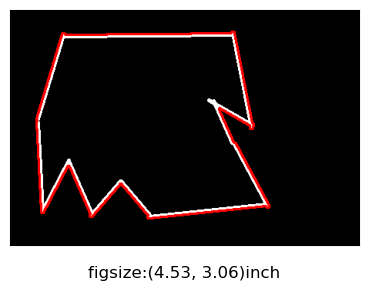

In [9]:
img = cv2.imread('assets/contours2.png')
# 转为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 转为二值图像
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# 轮廓检测
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
# 绘制轮廓
draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show('', res)
plt_show(res)

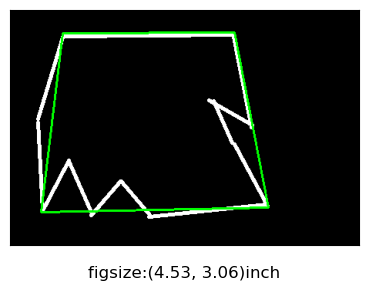

In [10]:
# 设置近似程度的参数（一般是轮廓周长的比率），参数越小则轮廓近似越接近原始轮廓
epsilon = 0.1*cv2.arcLength(cnt, closed=True)
approx = cv2.approxPolyDP(cnt, epsilon, closed=True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 255, 0), 2)
cv_show('', res)
plt_show(res)

#### 外接矩形

##### rect = cv2.boundingRect(contour)

cv2.boundingRect 函数是 OpenCV 库中的一个函数，用于计算给定轮廓的最小外接矩形。</br>这个矩形是包含轮廓的最小矩形，其边界与轮廓的边界相切。最小外接矩形通常用于定位和分析轮廓。

参数：</br>
- contour：输入轮廓，它是一个由点组成的列表，这些点定义了轮廓的形状。

返回值：</br>

该函数的返回值 rect 是包含轮廓的最小外接矩形，它是一个包含四个元素的元组：

- x：矩形的左上角 x 坐标。
- y：矩形的左上角 y 坐标。
- width：矩形的宽度。
- height：矩形的高度。

##### res = cv2.rectangle(image, pt1, pt2, color[, thickness[, lineType[, shift]]])

cv2.rectangle() 函数是 OpenCV 库中的一个函数，用于在图像上绘制一个矩形。</br>这个函数在图像处理和计算机视觉中非常有用，因为它可以帮助我们可视化图像中的特定区域或标记。

参数：</br>
- image：输入图像，通常是彩色图像。
- pt1：矩形的左上角坐标，格式为 (x, y)。
- pt2：矩形的右下角坐标，格式为 (x, y)。
- color：矩形的颜色，它是一个由三个元素组成的元组，分别代表BGR的值。
- thickness：矩形的厚度，可以是以下几种之一：
- - cv2.LINE_8：使用8-连通性来绘制矩形。
- - cv2.LINE_AA：使用抗锯齿的线，适用于低分辨率。
- - 正值：表示线宽。
- - 负值：表示填充矩形，填充的边界由 thickness 指定。
- lineType：线型，默认为 cv2.LINE_8。
- shift：当使用 32 位图像时，shift 参数指定输出图像的深度，默认为 0。

返回值：</br>
- res是绘制矩形后的图像


##### 示例

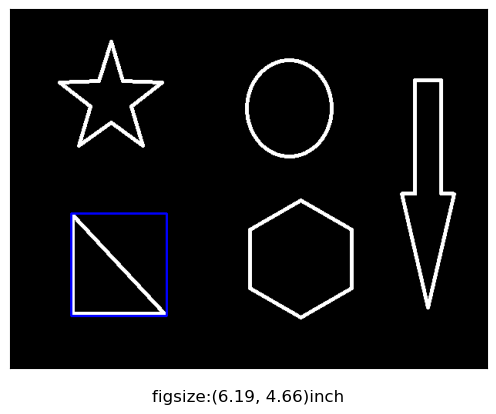

In [11]:
img = cv2.imread('assets/contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv_show('', img)
plt_show(img)

轮廓面积与外接矩形面积的比值

In [59]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area) / rect_area
print('轮廓面积与外接矩形面积之比：', extent)

轮廓面积与外接矩形面积之比： 0.5154317244724715


##### 外接圆

##### (x, y), radius = cv2.minEnclosingCircle(contour)

cv2.minEnclosingCircle 函数是 OpenCV 库中的一个函数，用于在图像中找到一个最小外接圆，该圆可以完全包围一个给定的轮廓。</br>这个函数在图像处理和计算机视觉中非常有用，因为它可以帮助我们定位和分析图像中的圆形或接近圆形的对象。

参数：</br>
- contour：输入轮廓，它是一个由点组成的列表，这些点定义了轮廓的形状。

返回值：</br>
- (x, y) 和 radius 分别是圆心的坐标和圆的半径

##### res = cv2.circle(image, center, radius, color[, thickness[, lineType[, shift]]])

cv2.circle 函数是 OpenCV 库中的一个函数，用于在图像上绘制一个圆。</br>这个函数在图像处理和计算机视觉中非常有用，因为它可以帮助我们可视化图像中的特定区域或标记。

参数：</br>
- image：输入图像，通常是彩色图像。
- center：圆心的坐标，格式为 (x, y)。
- radius：圆的半径。
- color：圆的颜色，它是一个由三个元素组成的元组，分别代表红色、绿色和蓝色的值。
- thickness：圆的厚度，可以是以下几种之一：
- - cv2.LINE_8：使用8-连通性来绘制圆。
- - cv2.LINE_AA：使用抗锯齿的线，适用于低分辨率。
- - 正值：表示线宽。
- - 负值：表示填充圆，填充的边界由 thickness 指定。
- lineType：线型，默认为 cv2.LINE_8。
- shift：当使用 32 位图像时，shift 参数指定输出图像的深度，默认为 0。

返回值：</br>
- 绘制圆后的图像

##### 示例

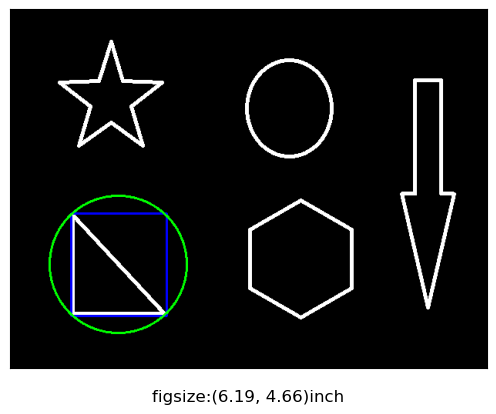

In [12]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
cv_show('', img)
plt_show(img)